In [1]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [2]:
X_train= X_train.reshape(-1,784)

X_test= X_test.reshape(-1,784)

X_train=X_train/255.

X_test=X_test/255.

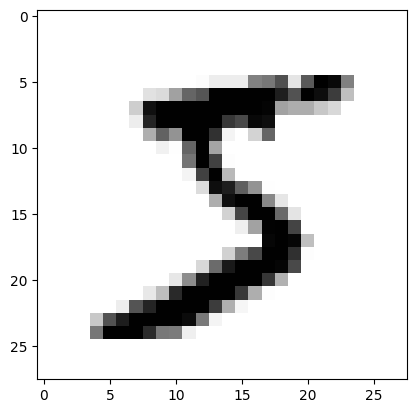

In [5]:
import matplotlib.pyplot as plt

from matplotlib import cm

plt.imshow(X_train[0].reshape(28,28),cmap=cm.gray_r)

plt.show()

In [6]:
import torch

# 학습용 데이터 텐서 변환

# from_numpy() 넘파이배열을 텐서로 변환

X_train = torch.from_numpy(X_train).float()

y_train = torch.from_numpy(y_train.astype('int32')).long()

# 검증용 데이터 텐서 변환

X_test = torch.from_numpy(X_test).float()

y_test = torch.from_numpy(y_test.astype('int32')).long()

# 변환된 텐서의 샘플수 확인

print(X_train.shape)

print(y_train.shape)

torch.Size([60000, 784])
torch.Size([60000])


In [7]:
from torch.utils.data import DataLoader, TensorDataset

# 독립변수와 종속변수 텐서를 합침

train = TensorDataset(X_train, y_train)

# 미니배치 분할

train_loader = DataLoader(train, batch_size=100, shuffle=True)

In [8]:
import torch.nn as nn

class Net(nn.Module):

    def __init__(self):

        super(Net, self).__init__()

        self.fc1 = nn.Linear(784, 256)

        self.fc2 = nn.Linear(256, 256)

        self.fc3 = nn.Linear(256, 256)

        self.fc4 = nn.Linear(256, 128)

        self.fc5 = nn.Linear(128, 128)

        self.fc6 = nn.Linear(128, 10)

    def forward(self, x):

        x = F.relu(self.fc1(x))

        x = F.relu(self.fc2(x))

        x = F.relu(self.fc3(x))

        x = F.relu(self.fc4(x))

        x = F.relu(self.fc5(x))

        x = self.fc6(x)

        return F.log_softmax(x,dim=0)

model = Net()

In [10]:
import torch.nn.functional as F

import torch.optim as optim

# 손실함수

criterion = nn.CrossEntropyLoss()

# 최적화함수

optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(100):

    total_loss = 0

    for X_train, y_train in train_loader:

        #X_train=X_train.cuda()

        #y_train=y_train.cuda()  

        # 경사 초기화

        optimizer.zero_grad()

        # 순전파 계산

        output = model(X_train)

        # 오차계산

        loss = criterion(output, y_train)

        # 역전파 계산

        loss.backward()

        # 가중치 업데이트

        optimizer.step()

        # 누적 오차 계산

        total_loss += loss.data

    # 10회 반복마다 누적오차 출력

    if (epoch+1) % 10 == 0:

        print(epoch+1, total_loss)

10 tensor(291.0191)
20 tensor(82.9609)
30 tensor(41.9626)
40 tensor(22.0015)
50 tensor(11.2072)
60 tensor(5.9252)
70 tensor(2.8104)
80 tensor(2.2575)
90 tensor(1.3720)
100 tensor(0.6577)


In [11]:
result = torch.max(model(X_test).data, 1)[1]

y_test=y_test.cpu()

result=result.cpu()

print(result[:5]) # 출력값

print(y_test.data.numpy()[:5]) #실제값

# 모형의 정확도 측정

accuracy = sum(y_test.data.numpy() == result.numpy()) / len(y_test.data.numpy())

# 모형의 정확도 출력

accuracy

tensor([7, 2, 1, 0, 4])
[7 2 1 0 4]


0.9765

In [12]:
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=128, bias=True)
  (fc6): Linear(in_features=128, out_features=10, bias=True)
)


In [13]:
from torchinfo import summary

batch_size=100

# batch_size, input nodes

summary(model, input_size=(batch_size, 784))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [100, 10]                 --
├─Linear: 1-1                            [100, 256]                200,960
├─Linear: 1-2                            [100, 256]                65,792
├─Linear: 1-3                            [100, 256]                65,792
├─Linear: 1-4                            [100, 128]                32,896
├─Linear: 1-5                            [100, 128]                16,512
├─Linear: 1-6                            [100, 10]                 1,290
Total params: 383,242
Trainable params: 383,242
Non-trainable params: 0
Total mult-adds (M): 38.32
Input size (MB): 0.31
Forward/backward pass size (MB): 0.83
Params size (MB): 1.53
Estimated Total Size (MB): 2.67